In [8]:
import numpy as np

In [9]:
import cv2
from google.colab import files
import matplotlib.pyplot as plt


# Image upload

In [10]:
upload = files.upload()

Saving test_img.jpg to test_img (1).jpg


In [11]:
#we read the image using imread function from cv2 library
img = cv2.imread('test_img.jpg')

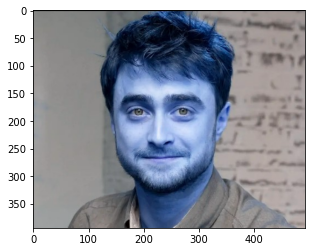

In [12]:
plt.imshow(img)

In [13]:
#By default, the images are read in the form BGR( Blue Green Red)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

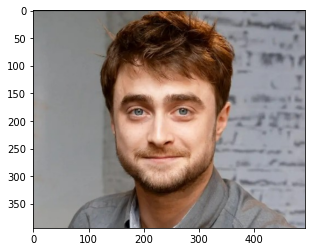

In [14]:
plt.imshow(img)

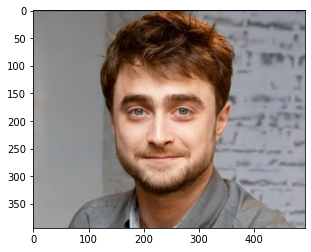

In [15]:
# Method 2 of viewing // without converting to brg to rgb
import matplotlib.image as mpimg
img = mpimg.imread('test_img.jpg')
plt.imshow(img)

# Haar implementation

In [16]:
f_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

In [17]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_eye.xml")

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

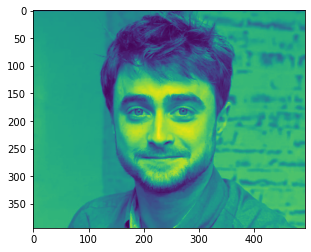

In [19]:
plt.imshow(gray)

In [20]:
faces = f_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=9)

In [21]:
from google.colab.patches import cv2_imshow

In [22]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)



# Result

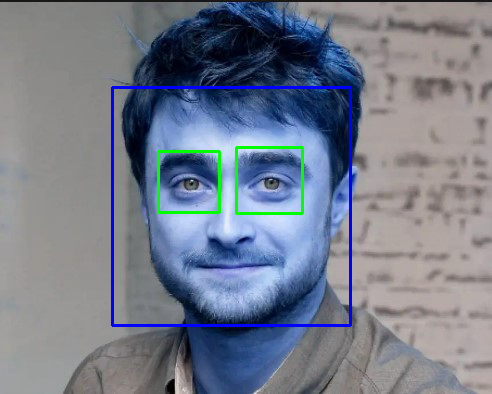

In [23]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()